# THE FOLLOWING CODE IS THE EDA 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


c:\Users\shash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


##### IMPORTING ALL THE CSV TO DATA FRAMES 

In [3]:
drivers = pd.read_csv('drivers.csv')
drivers.head()
circuts = pd.read_csv('circuits.csv')
races = pd.read_csv('races.csv')
race_results = pd.read_csv('results.csv')
races['date']
status = pd.read_csv('status.csv')
race_results['statusId'][0]

1

## THE FOLLOWING CODE IS FOR FINDING OUT THE MOST DANGEROUS TRACKS USING A HEAT MAP 

the below code makes a dict with all circuits and the number of crashes occured on that circut 

In [4]:
cirid_dict = {}
raceid_dict ={}

for i in range(len(race_results['statusId'])):
    key  = race_results['raceId'][i]
    if key not in raceid_dict:
        raceid_dict[key]= 0
    if race_results['statusId'][i] == 3 or race_results['statusId'][i] == 4 or race_results['statusId'][i] == 20:
        
        if raceid_dict.get(key)==0 :
            raceid_dict[key] =1 
        else:
            raceid_dict[key] += 1 
# print(raceid_dict)
for i in range(len(races['circuitId'])):
    key = races['circuitId'][i]
    # if key not in cirid_dict:
#         # cirid_dict[key]=0
    # print(key,races['raceId'][i],raceid_dict.get(races['raceId'][i]))
    if raceid_dict.get(races['raceId'][i]) != None:
        if key in cirid_dict:
            cirid_dict[key]+= raceid_dict.get(races['raceId'][i])
        else:
            cirid_dict[key] = raceid_dict.get(races['raceId'][i])
# print(cirid_dict)

In [5]:
names ={}
for i in range(len(circuts['circuitId'])):
    key  = circuts['circuitId'][i]
    names[key] = circuts['circuitRef'][i]
# print(names)
l = list(cirid_dict.keys())
trackNames = list(names.values())
# print(trackNames)

##### HEAT MAP

<function matplotlib.pyplot.show(close=None, block=None)>

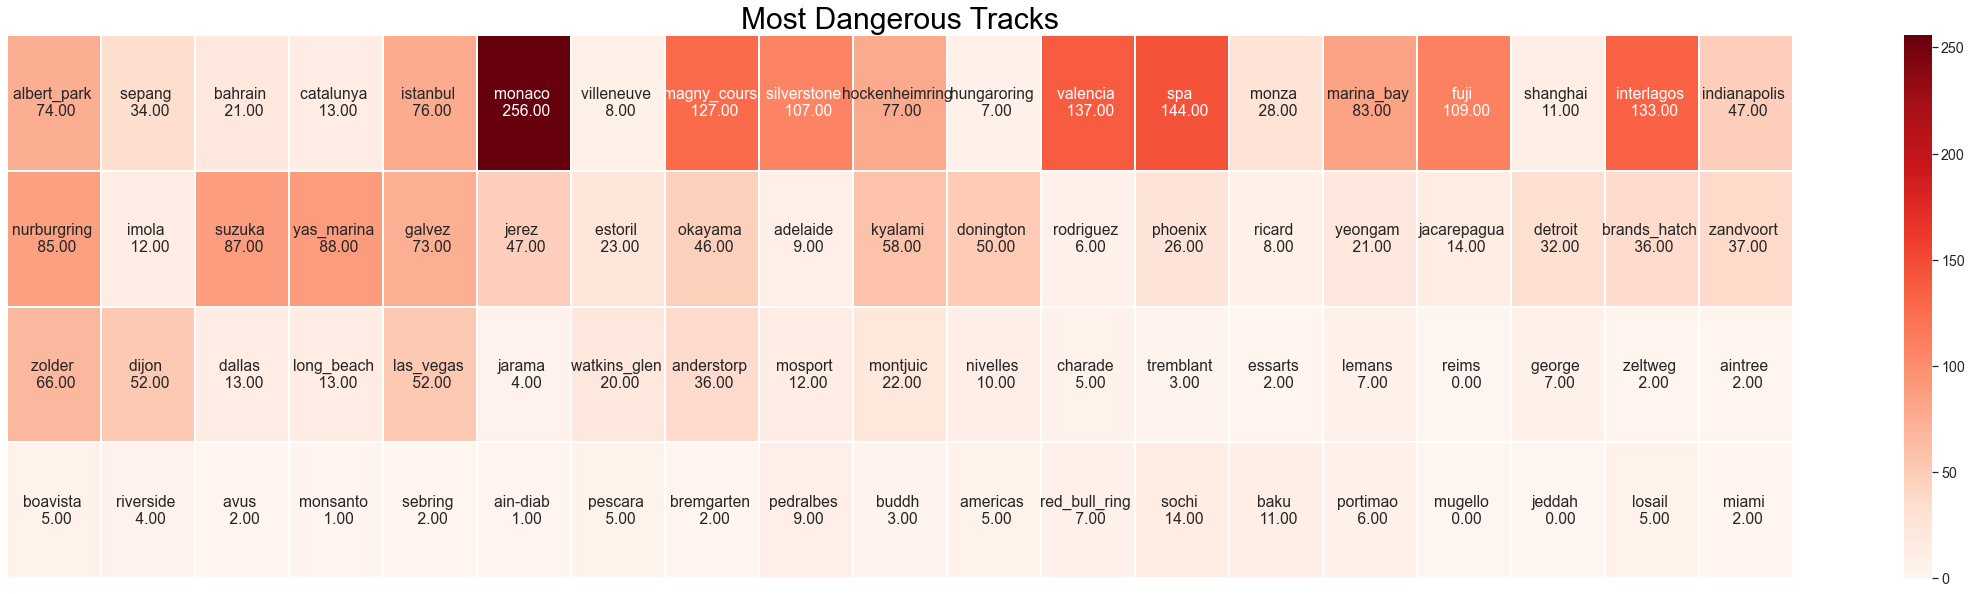

In [6]:
trackNames = ((np.asarray(trackNames)).reshape(4,19))

j = list(cirid_dict.values())
j = np.array(j).reshape(4,19)
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb, value in zip(trackNames.flatten(),
                                               j.flatten())])
         ).reshape(4,19)
fig, ax = plt.subplots(figsize=(40,10))

# Add title to the Heat map

title = 'Most Dangerous Tracks'
# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=30)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')
sns.set(font_scale=1.3)
sns.heatmap(j,annot=labels,fmt="",cmap='Reds',linewidths=0.3,ax=ax)
plt.show

## THE FOLLOWING CODE IS FOR THE DRIVERS WITH MOST NUMBER OF CRASHES 

In [7]:
driverId_dict = {}

for i in range(len(race_results['statusId'])):
    key  = race_results['driverId'][i]
    if key not in driverId_dict:
        driverId_dict[key]= 0
    if race_results['statusId'][i] == 3 or race_results['statusId'][i] == 4 or race_results['statusId'][i] == 20:
        # print(key)
        if driverId_dict.get(key)==0:
            driverId_dict[key] = 1 
        else:
            driverId_dict[key] += 1 
# print(driverId_dict)

In [8]:
# dNames ={}
# for i in range(len(drivers['driverId'])):
#     key  = drivers['driverId'][i]
#     dNames[key] = drivers['driverRef'][i]
# # print(names)
# # l = list(cirid_dict.keys())
# driverNames = list(dNames.keys())
# # driverNames
# crashes  = list(driverId_dict.values())
# print(dNames)

In [9]:
crashes = []
driversNames = []
def append(name):
    crashes.append(dNames.get(name))
    driversNames.append(name)
    
dNames ={}
for i in range(len(drivers['code'])):
    key  = drivers['code'][i]
    dNames[key] = driverId_dict.get(drivers['driverId'][i])
# print(names)
# # l = list(cirid_dict.keys())
append('HAM')
append('LEC')
append('VER')
append('BOT')
append('RIC')
append('NOR')
append('LAT')
append('MSC')
append('MAZ')
append('GAS')
append('MAG')
append('ALB')
# print(driversNames,crashes)


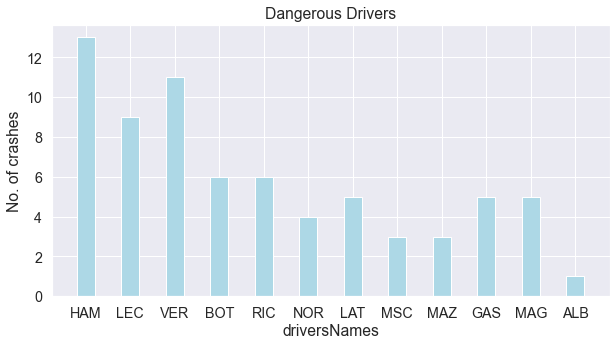

In [10]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(driversNames, crashes, color ='#ADD8E6',
        width = 0.4)
# ax = plt.axes()
# ax.set_facecolor("black")
 
plt.xlabel("driversNames")
plt.ylabel("No. of crashes")
plt.title("Dangerous Drivers")
plt.show()

## Constructors with the most number of mechanical failures 

In [11]:
# mech_fault = (race_results['statusId']==1 or race_results['statusId']==2
#               or race_results['statusId']==3 or
#               race_results['statusId']==4 or
#               race_results['statusId']==11 or
#               race_results['statusId']==12 or
#               race_results['statusId']==13 or
#               race_results['statusId']==14 or
#               race_results['statusId']==15 or
#               race_results['statusId']==16 or
#               race_results['statusId']==17 or
#               race_results['statusId']==18 or
#               race_results['statusId']==19 or
#               race_results['statusId']==20 or
#               race_results['statusId']==45 or
#               race_results['statusId']==50 or
#               race_results['statusId']==53 or
#               race_results['statusId']==55 or
#               race_results['statusId']==58 or
#               race_results['statusId']==73 or
#               race_results['statusId']==81 or
#               race_results['statusId']==88 or
#               race_results['statusId']==97 or
#               race_results['statusId']==100 or
#               (race_results['statusId']>= 111 and race_results['statusId']<= 134)
#               race_results['statusId']==138 or
#               race_results['statusId']==139 or)

the followig code makes a dict with Constructor and the number of mechanical failures 

In [12]:
concId_dict ={}

for i in range(len(race_results['statusId'])):
    key  = race_results['constructorId'][i]
    
    if key not in concId_dict:
        concId_dict[key]= 0
    if (race_results['statusId'][i]!=1 |
        race_results['statusId'][i]!=2 | 
        race_results['statusId'][i]!=3 |
        race_results['statusId'][i]!=11 |
        race_results['statusId'][i]!=12 |
        race_results['statusId'][i]!=13 |
        race_results['statusId'][i]!=14 |
        race_results['statusId'][i]!=15 |
        race_results['statusId'][i]!=4 |
        race_results['statusId'][i]!=16 |
        race_results['statusId'][i]!=17 |
        race_results['statusId'][i]!=18 |
        race_results['statusId'][i]!=19 |
        race_results['statusId'][i]!=20 |
        race_results['statusId'][i]!=45 |
        race_results['statusId'][i]!=50 |
        race_results['statusId'][i]!=53 |
        race_results['statusId'][i]!=55 |
        race_results['statusId'][i]!=58 |
        race_results['statusId'][i]!=73 |
        race_results['statusId'][i]!=81 |
        race_results['statusId'][i]!=88 |
        race_results['statusId'][i]!=97 |
        race_results['statusId'][i]!=100 |
        race_results['statusId'][i]>= 111 &
        race_results['statusId'][i]<= 134 | 
        race_results['statusId'][i]!=138 |
        race_results['statusId'][i]!=139 ):
        
        if concId_dict.get(key)==0 :
            concId_dict[key] =1 
        else:
            concId_dict[key] += 1 
# concId_dict

In [13]:
constructors = pd.read_csv('constructors.csv')
construct_dict = {}
for i in range(0,len(constructors['constructorId'])):
    # print(concId_dict.get(i+1))
    if (concId_dict.get(i+1) != None):
        
        if (concId_dict.get(i+1) > 20):
            key = constructors['constructorRef'][i]
            construct_dict[key] = concId_dict.get(i+1)
            
# construct_dict       

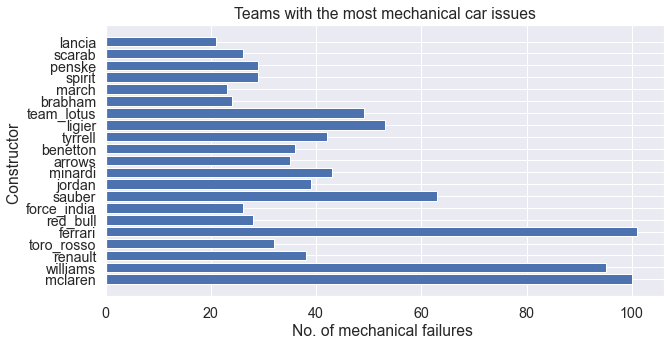

In [14]:
cons = list(construct_dict.keys())
mech_fails = list(construct_dict.values())
fig = plt.figure(figsize = (10, 5))
plt.barh(cons, mech_fails)
 
# setting label of y-axis
plt.ylabel("Constructor ")
 
# setting label of x-axis
plt.xlabel("No. of mechanical failures ")
plt.title("Teams with the most mechanical car issues")
plt.show()

## fastest tracks 

this is done by calculating avg time taken by a driver to finish one lap for a given track, along the years 

In [15]:
lapTimes = pd.read_csv('lap_times.csv')
# lapTimes['milliseconds']

In [16]:
lap_dict = {}
for i in range(len(lapTimes['raceId'])):
    key  = lapTimes['raceId'][i]
    if key not in lap_dict:
        lap_dict[key]= [0,0]
    if lap_dict.get(key)[1]==0:
            lap_dict[key][1] = 1 
            lap_dict[key][0] = lapTimes['milliseconds'][i]
            
    else:
            lap_dict[key][1] += 1   
            lap_dict[key][0] += lapTimes['milliseconds'][i] 
# lap_dict
temp = {}
for i in lap_dict.keys():
    temp[i] = lap_dict.get(i)[0]/lap_dict.get(i)[1]
# temp

In [17]:
circ_laptime_dict = {}
for i in range(len(races['name'])):
    # print(lap_dict.get(races['raceId'][i])[0])
    key = races['name'][i]
    if key not in circ_laptime_dict.keys():
        circ_laptime_dict[key]= [0,0]
    # if (lap_dict.get(races['raceId'][i])[0] != None):
    if races['raceId'][i] in list(temp.keys()):
        if circ_laptime_dict.get(key)[1]==0:
                circ_laptime_dict[key][0] = temp.get(races['raceId'][i])
                circ_laptime_dict[key][1] = 1
        else:
                circ_laptime_dict[key][0]+= temp.get(races['raceId'][i])
                circ_laptime_dict[key][1]+=1
            # circ_laptime_dict[key]= [0,0]

# we have number of races stored in 2nd value of the list and the first value has to be updated to avg 




tnames =  list(circ_laptime_dict.keys())
temp2 ={}
for i in circ_laptime_dict.keys():
    if circ_laptime_dict.get(i)[1] != 0:
        temp2[i] = circ_laptime_dict.get(i)[0]/circ_laptime_dict.get(i)[1]

for i in tnames:
    if circ_laptime_dict.get(i)[1] != 0:
        circ_laptime_dict.get(i)[0] = circ_laptime_dict.get(i)[0]/circ_laptime_dict.get(i)[1]
    else: 
        del circ_laptime_dict[i]
#circ_laptime_dict =>> contains the total number of times that track has occured(1) and avg speed to complete 1 lap (0)
# print(circ_laptime_dict)
# len(circ_laptime_dict)
 

<function matplotlib.pyplot.show(close=None, block=None)>

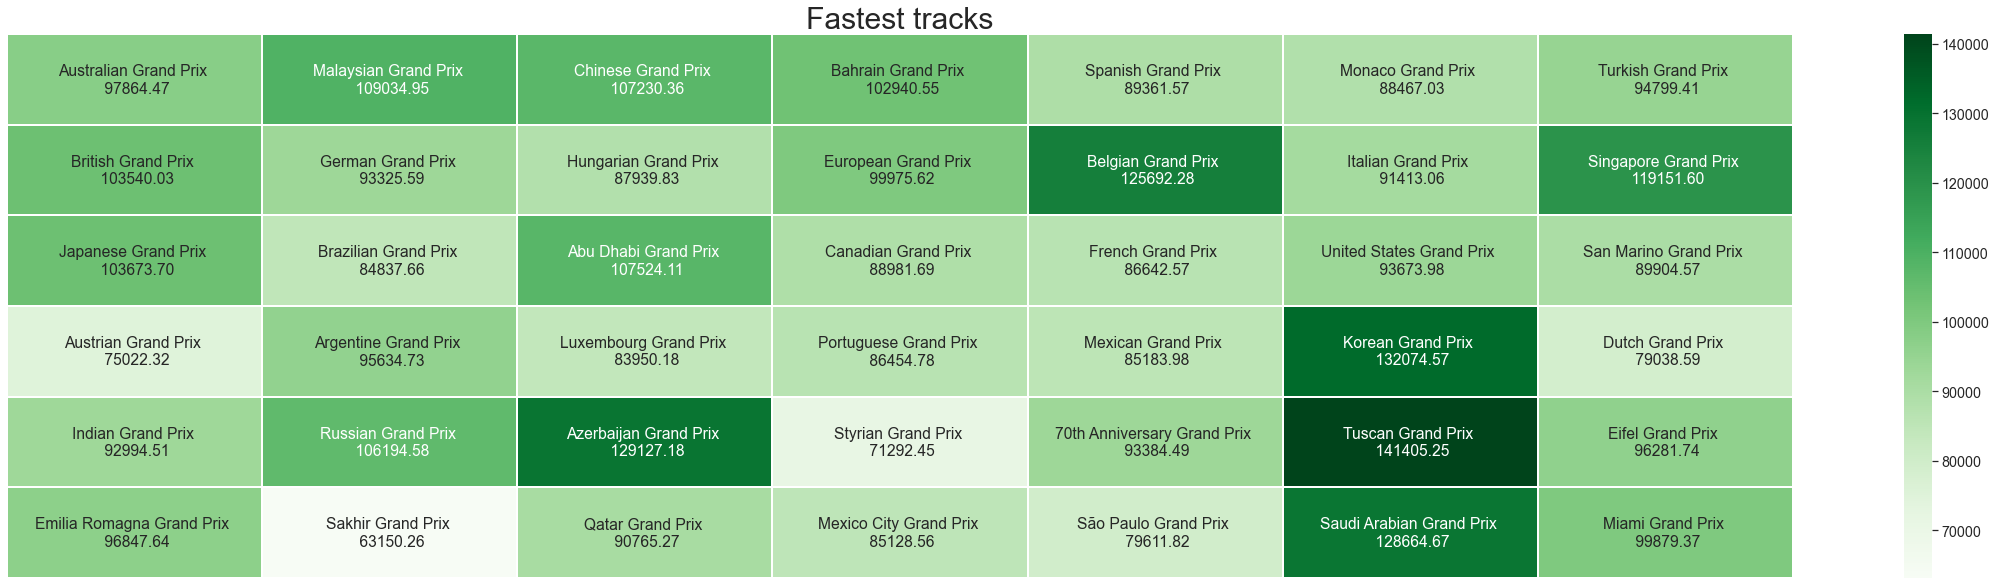

In [18]:
tnames =  list(temp2.keys())
laptime_avg = list(temp2.values())

tnames =  ((np.asarray(tnames)).reshape(6,7))   
laptime_avg = np.array(laptime_avg).reshape(6,7)
labels2 = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb, value in zip(tnames.flatten(),
                                               laptime_avg.flatten())])
         ).reshape(6,7)
fig, ax = plt.subplots(figsize=(40,10))

# Add title to the Heat map

title = 'Fastest tracks'
# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=30)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')
sns.set(font_scale=1.3)
sns.heatmap(laptime_avg,annot=labels2,fmt="",cmap='Greens',linewidths=0.3,ax=ax)
plt.show

## Average pitstop times for each track

In [19]:
pits = pd.read_csv('pit_stops.csv')

# pit1 ={}
# pit2 = {}
# pit3 ={}

# for i in range (len(pits['raceId'])):
#     key =  pits['raceId'][i]
#     if pits['stop'][i] == 1 :
#         if key in pit1.keys():
#             pit1[key].append(pits['milliseconds'][i])
#         else:
        
#             pit1[key] = []
        
        
#     if pits['stop'][i] == 2 :
#         if key in pit2.keys():
#             pit2[key].append(pits['milliseconds'][i])
#         else:
        
#             pit2[key] = []
        
        
#     if pits['stop'][i] == 3 :
#         if key in pit3.keys():
#             pit3[key].append(pits['milliseconds'][i])
#         else:
#             pit3[key] = []      

In [20]:
raceName_dict = {}
for i in range(len(races['raceId'])):
    key = races['raceId'][i] 
    raceName_dict[key] = races['name'][i]
# raceName_dict
    

In [21]:
# track_pit1_dict ={}
# for i in pit1.keys():
#     key= raceName_dict.get(i)
#     if key in track_pit1_dict.keys():
#         track_pit1_dict[key] += pit1.get(i)
#     else :
#         track_pit1_dict[key] = pit1.get(i)
# track_pit2_dict ={}
# for i in pit2.keys():
#     key= raceName_dict.get(i)
#     if key in track_pit2_dict.keys():
#         track_pit2_dict[key] += pit2.get(i)
#     else :
#         track_pit2_dict[key] = pit2.get(i)
# track_pit3_dict ={}
# for i in pit3.keys():
#     key= raceName_dict.get(i)
#     if key in track_pit3_dict.keys():
#         track_pit3_dict[key] += pit3.get(i)
#     else :
#         track_pit3_dict[key] = pit3.get(i)
#track wise pit times , pit1 , pit2 ,pit3 


In [22]:
# # columns = ['pit1','pit2','pit3']
# aus = {'pit1':track_pit1_dict.get('Australian Grand Prix')}
# ausdf = pd.DataFrame(aus)
# # ausdf['pit2'] = track_pit2_dict.get('Australian Grand Prix')

# ausdf['pit1']
# sns.boxplot(x= ausdf['pit1'])
# track_pit1_dict
# pits['raceId'].unique()

In [23]:
# pits['raceId']

In [29]:
pitstopdf =  pits[['raceId','stop','milliseconds']].copy()
# print(pitstopdf['raceId'])
for i in pitstopdf['raceId'].unique():
    pitstopdf = pitstopdf.replace(i,raceName_dict.get(i))

    
pitstopdf['milliseconds'] = round(pitstopdf['milliseconds']/1000,2)
pitstopdf = pitstopdf[pitstopdf['stop']<4]
pitstopdf = pitstopdf[pitstopdf['milliseconds']<45]
pitstopdf.set_index('raceId')

# pitstopdf.drop(['Malaysian Grand Prix','Chinese Grand Prix', 'Turkish Grand Prix', 'Canadian Grand Prix', 'European Grand Prix',  'Hungarian Grand Prix','Japanese Grand Prix', 'Korean Grand Prix', 'Indian Grand Prix','Bahrain Grand Prix', 'Russian Grand Prix', 'Mexican Grand Prix','Azerbaijan Grand Prix', 'Styrian Grand Prix','70th Anniversary Grand Prix', 'Tuscan Grand Prix','Eifel Grand Prix', 'Portuguese Grand Prix','Emilia Romagna Grand Prix', 'Sakhir Grand Prix','Dutch Grand Prix', 'Mexico City Grand Prix','São Paulo Grand Prix', 'Qatar Grand Prix','Saudi Arabian Grand Prix', 'Miami Grand Prix'],inplace=True)
pitstopdf = pitstopdf[pitstopdf['raceId'].str.contains("Malaysian Grand Prix|Chinese Grand Prix|Turkish Grand Prix|Canadian Grand Prix|European Grand Prix|Hungarian Grand Prix|Japanese Grand Prix|Korean Grand Prix|Indian Grand Prix|Bahrain Grand Prix|Russian Grand Prix|Mexican Grand Prix|Azerbaijan Grand Prix|Styrian Grand Prix|70th Anniversary Grand Prix|Tuscan Grand Prix|Eifel Grand Prix|Portuguese Grand Prix|Emilia Romagna Grand Prix|Sakhir Grand Prix|Dutch Grand Prix|Mexico City Grand Prix|São Paulo Grand Prix|Qatar Grand Prix|Saudi Arabian Grand Prix|Miami Grand Prix")==False]


pitstopdf.rename(columns= {'milliseconds':'seconds'},inplace=True )



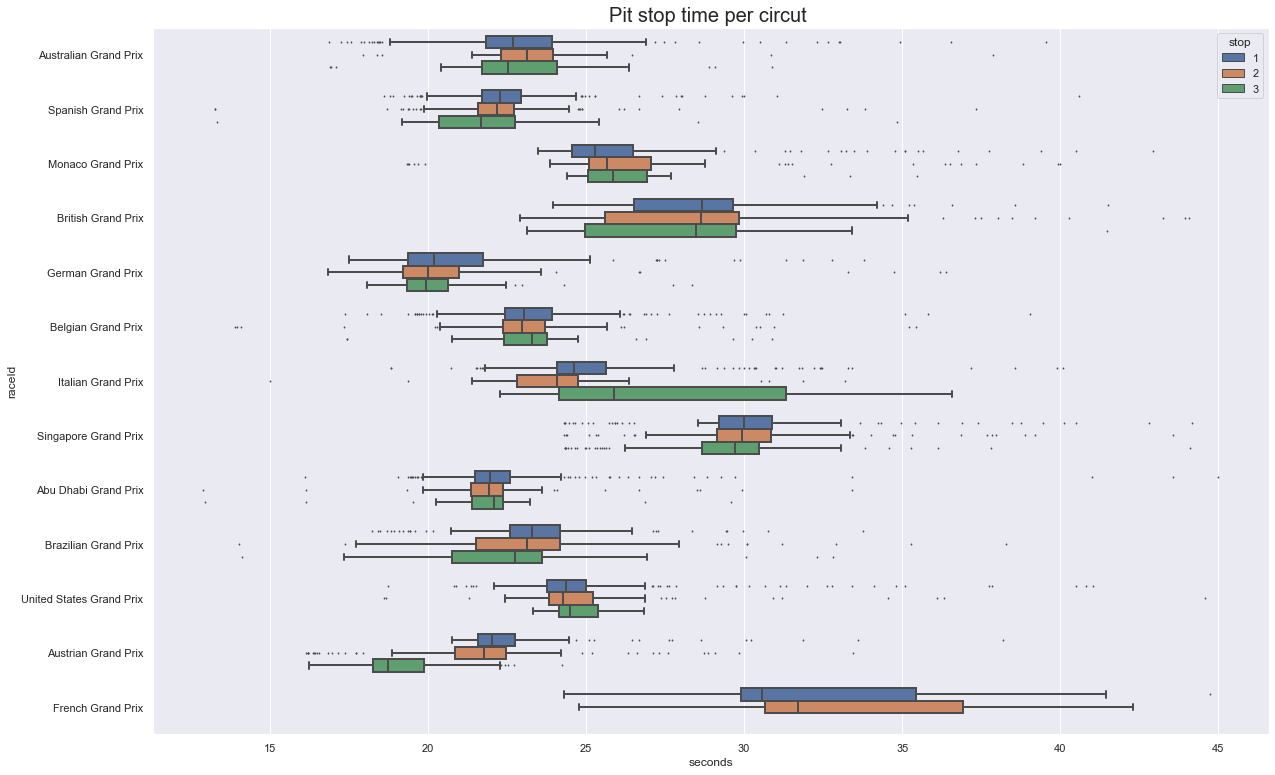

In [48]:
fig = plt.gcf()
fig.set_size_inches(20,13)
sns.set(font_scale=1)
sns.boxplot(data=pitstopdf,x='seconds',y='raceId',hue='stop',width=0.7,linewidth =2,fliersize=1)

plt.title("Pit stop time per circut ",fontdict={'fontsize':20})
# plt.title("Drivers Pole to win conversion",)
plt.show()
# 
# pitstopdf['milliseconds']

## Shows driver with most wins and ploe to win conversion percentage 

In [32]:
type(race_results['position'][0])
type(race_results['grid'][0])

numpy.int64

In [33]:
count =  0
pole2win = {}
for i in range(len(race_results['raceId'])):
    # print(race_results['position'][i])
    
    if race_results['grid'][i] == 1:
        key = race_results['driverId'][i]
        # print(race_results['grid'][i],race_results['position'][i])
        if key not in pole2win.keys():
            pole2win[key] = [0,0]
            
        if race_results['position'][i]=="\\N":
            pole2win[key][1]+= 1
            
        elif (race_results['grid'][i] == int(race_results['position'][i])):
            
            pole2win[key][0]+= 1 # converted pole to win 
            # print("sucess",pole2win[key][0])
        else :
            pole2win[key][1]+= 1  #fail to convert pole to win 
            # print('fail',pole2win[key][1])   
# pole2win        
       

In [34]:
drivercode_id ={}
for i in range(len(drivers['code'])):
    key  = drivers['driverId'][i]
    drivercode_id[key] = drivers['code'][i]
# drivercode_id

In [35]:
ploe2wincode = {}
for i in pole2win.keys():
    ploe2wincode[drivercode_id.get(i)]=pole2win.get(i)
# ploe2wincode

In [36]:
rev_dict={}
rev_avgdict ={}
wins =[]
driversss=list(ploe2wincode.keys())
percent = []
for i in driversss:
    wins.append(ploe2wincode.get(i)[0]+1)
    percent.append(round((ploe2wincode.get(i)[0]+1)/(ploe2wincode.get(i)[0]+ploe2wincode.get(i)[1]+1)*100,2))
# print(driversss,wins,percent)
# wins.sort()
# wins.reverse()
for i in range(len(wins)):
    rev_dict[wins[i]]= driversss[i]
    rev_avgdict[driversss[i]] = percent[i]
rev_dict,rev_avgdict
wins =  list(rev_dict.keys())
wins.sort()
wins.reverse()
percent=[]
driversss =[]
for i in range(len(wins)):
    driversss.append(rev_dict.get(wins[i]))
   
for i in range(len(driversss)): 
    percent.append(rev_avgdict.get(driversss[i]))
       
    
# wins = list(rev_dict.keys())
# driversss = list(rev_dict.values())
# percent = list(rev_avgdict.values())
# wins,driversss,percent

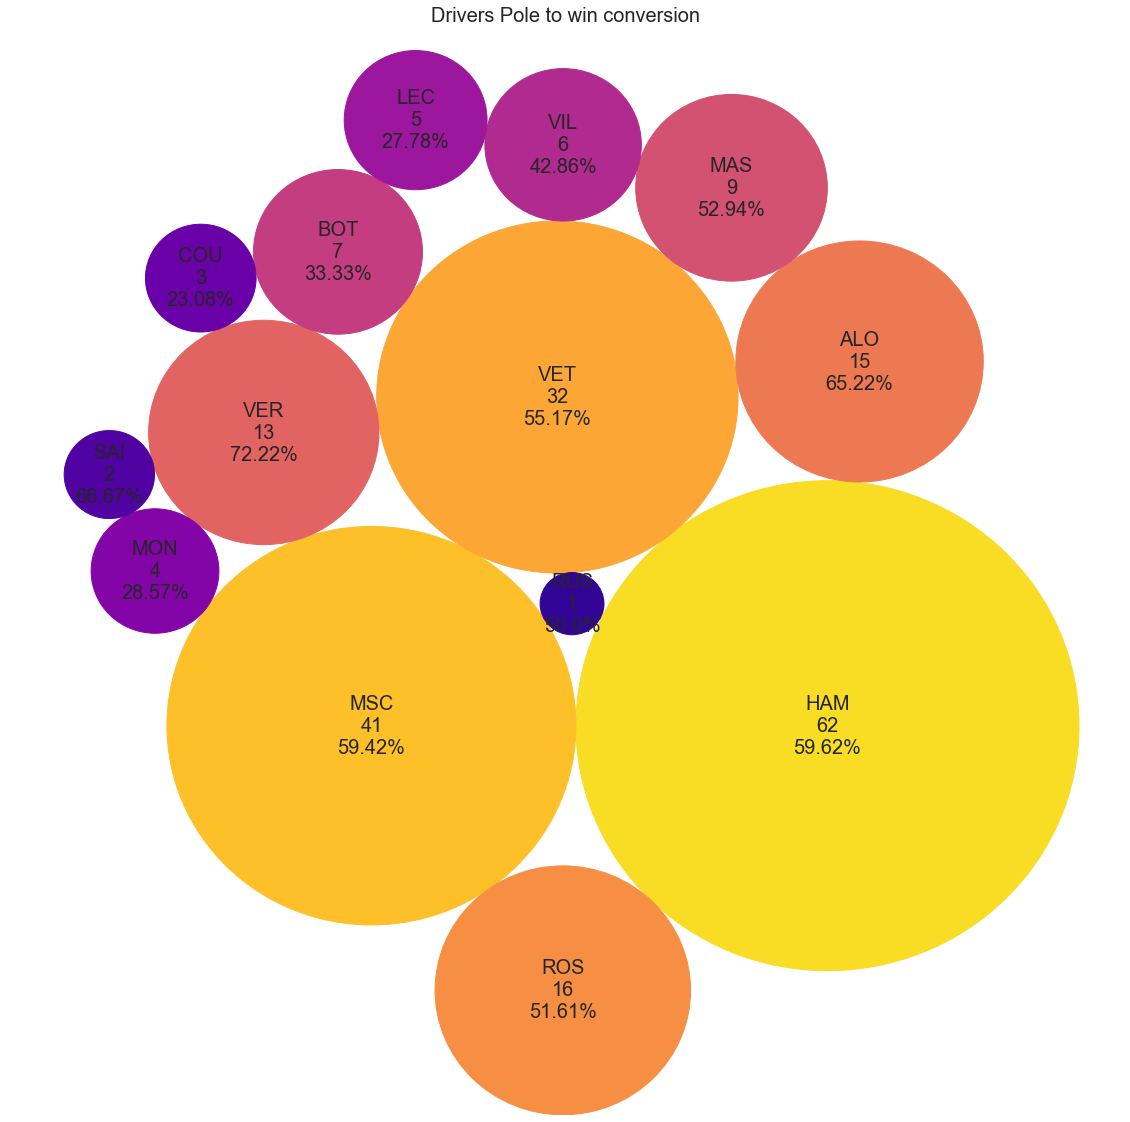

In [47]:
import circlify



pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(driversss)).as_hex())
# print(driversss,wins,percent)
# compute circle positions:
circles = circlify.circlify(wins, 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()
label = [i+'<br>'+str(j)+'<br>'+str(k)+'%' for i,j,k in zip(driversss,
                                                            wins,
                                                            percent)]
fig, ax = plt.subplots(figsize=(20,20), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, note, color in zip(circles, label, pal_):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color = color))
    plt.annotate(note.replace('<br>','\n'), (x,y), size=20, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.title("Drivers Pole to win conversion",fontdict={'fontsize':20})
plt.show()

## Age of Champions over the years 

In [38]:
from datetime import datetime

# datetime_str = races['date'][0]

# date_object = datetime.strptime(datetime_str, '%Y-%m-%d').date()
# print(date_object.year)

In [39]:
type(races['year'][0])
driverStandings =  pd.read_csv('driver_standings.csv')
drivercode_id ={}
for i in range(len(drivers['driverRef'])):
    key  = drivers['driverId'][i]
    drivercode_id[key] = [drivers['driverRef'][i],drivers['dob'][i]]
# drivercode_id

In [40]:
year = 1999
rid = [] 
driverPts = {}
for i in range(len(races['raceId'])):
        
        if races['year'][i] == year:
            rid.append(races['raceId'][i])
for i in range(len(driverStandings['raceId'])):
        if driverStandings['raceId'][i] in rid:
            driverPts[driverStandings['driverId'][i]]= driverStandings['points'][i]
champ =  max(driverPts,key = lambda x:driverPts[x])

dob = drivercode_id.get(champ)[1]
dob = datetime.strptime(dob, '%Y-%m-%d').date()

age = year - dob.year
# age
# champ

In [41]:
driverStandings =  pd.read_csv('driver_standings.csv')
winnerAge = {}
def cal_champ(year):
    rid = [] 
    driverPts = {}
    for i in range(len(races['raceId'])):
            
            if races['year'][i] == year:
                rid.append(races['raceId'][i])
    for i in range(len(driverStandings['raceId'])):
            if driverStandings['raceId'][i] in rid:
                driverPts[driverStandings['driverId'][i]]= driverStandings['points'][i]
    champ =  max(driverPts,key = lambda x:driverPts[x])
    champ 
    dob = drivercode_id.get(champ)[1]
    dob = datetime.strptime(dob, '%Y-%m-%d').date()

    age = year - dob.year
    return [drivercode_id.get(champ)[0],age]

years  =  races['year'].unique()
for i in years:
    winnerAge[i] = cal_champ(i)
# winnerAge  
years.sort() 
years
ages = []
d = [] 
for i in years:
    ages.append(winnerAge.get(i)[1])
for i in years:
    d.append(winnerAge.get(i)[0])
# ages
temp ={"drivers":d,"Ages":ages,"Years":years}
plotdf =  pd.DataFrame(temp) 

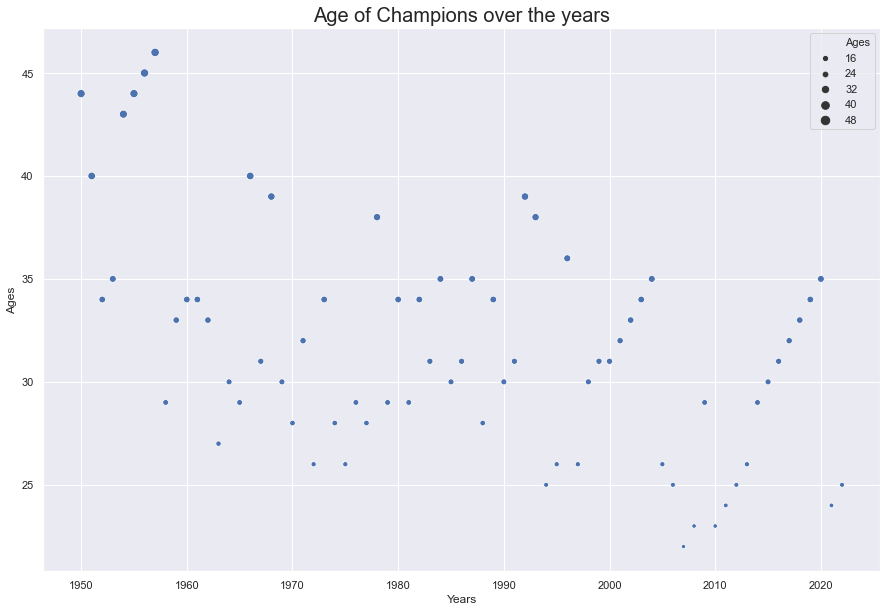

In [49]:

plt.figure(figsize=(15,10))
# sns.set(font_scale=1)

gfg = sns.scatterplot(data = plotdf, x = "Years", y = "Ages",size = "Ages")
gfg.legend(bbox_to_anchor= (1,1))

plt.title("Age of Champions over the years",fontdict={'fontsize':20})
plt.show()

## Most popular tracks 



In [43]:
tracks_years = {}

for i in range(len(races['name'])):
    key = races['name'][i]
    if key not in tracks_years.keys():
        tracks_years[key] = []
        tracks_years[key].append(races['year'][i])
    else:
        tracks_years[key].append(races['year'][i])
        
# tracks_years.keys()
     
# tyearsdf = pd.DataFrame(tracks_years)  

In [44]:
# tyearsdf = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in tracks_years.items() ]))
# tyearsdf = tyearsdf.T
# tyearsdf
popdf = races[['name','year']].copy()


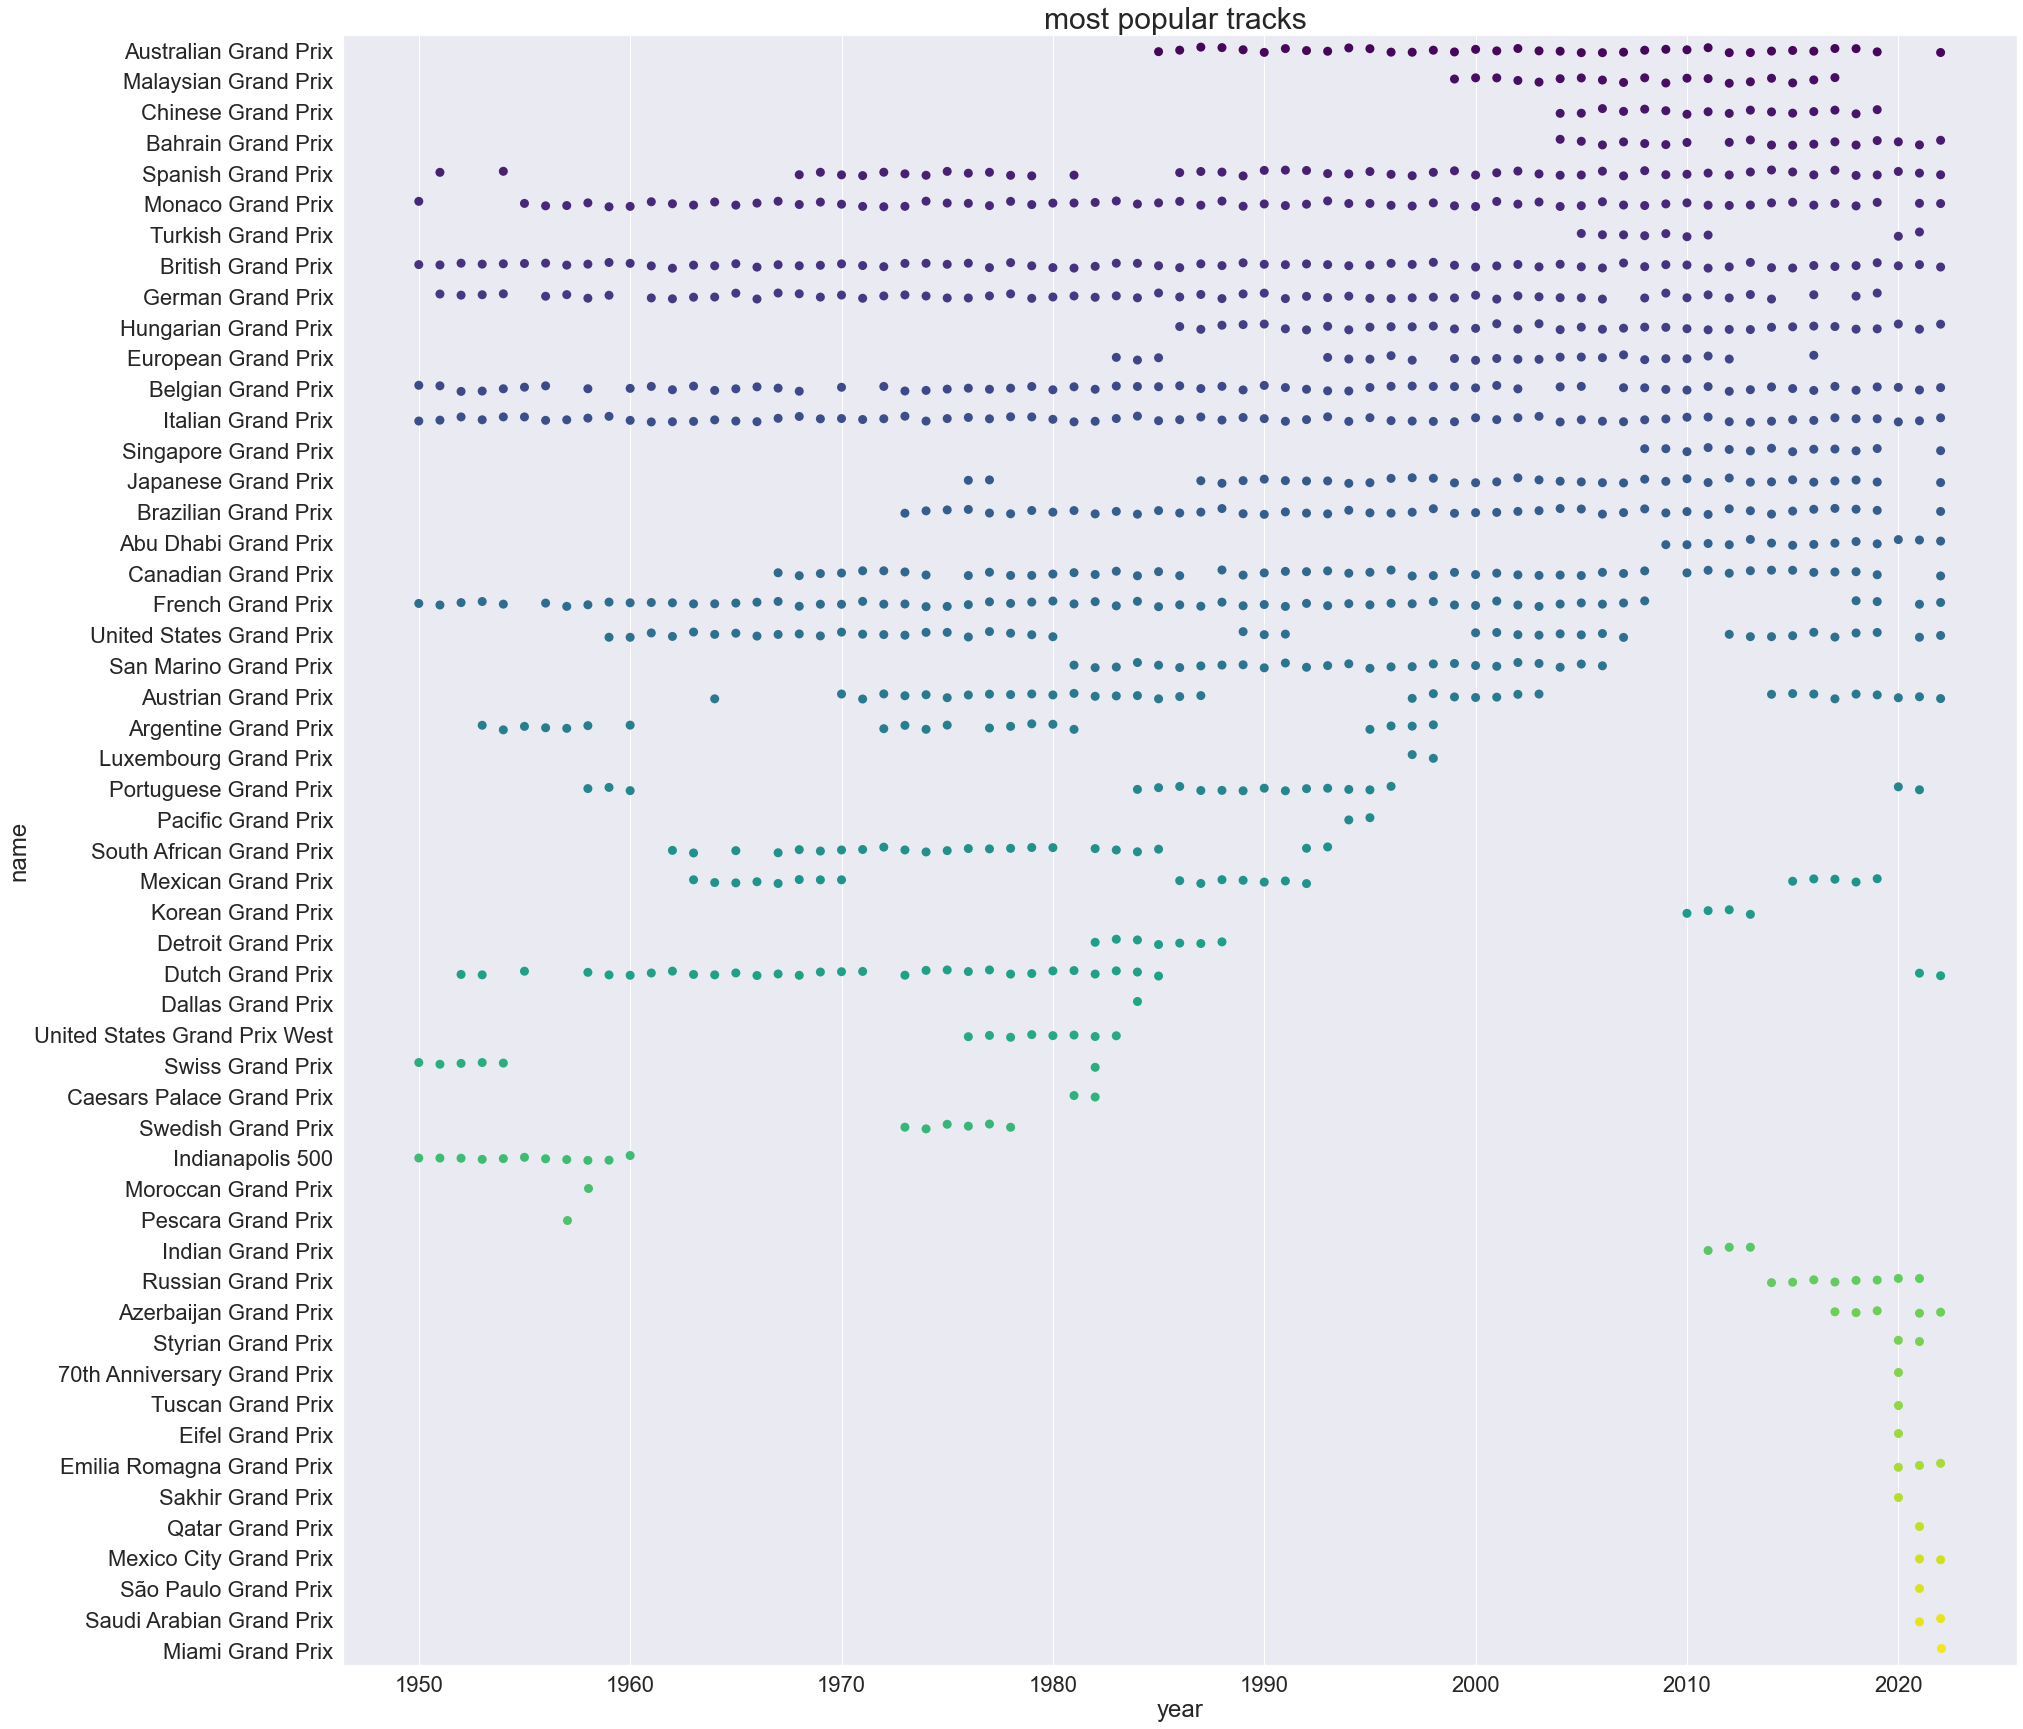

In [52]:
plt.figure(figsize=(30,30))
sns.set(font_scale=2)
sns.stripplot(x='year', y='name', data=popdf, palette='viridis',size =9)
plt.title("most popular tracks ",fontdict={'fontsize':30})
plt.show()
